In [1]:
import plotly
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import os
import math
import glob
from scipy import interpolate
from scipy.ndimage import gaussian_filter
#from sklearn.neighbors import NearestNeighbors

In [2]:
df2=pd.read_pickle("reweighted.pkl")
df2

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label,wall_clockt,cpt,outlier_MD_label,outlier_MD_frame,md_step,weight
0,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,0,4.029846,0.513320,"[0.6582605242729187, -1.203732967376709, 0.378...",-1.0,md_run_2_1697113447,2,172,1.697113e+09,NaN,NaN,NaN,0,1.000000
1,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,1,4.007001,0.545773,"[0.7967053651809692, -1.0128430128097534, 0.69...",-1.0,md_run_2_1697113447,2,59,1.697113e+09,NaN,NaN,NaN,1,1.000000
2,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,2,4.171796,0.569993,"[0.7967053651809692, -1.0128430128097534, 0.69...",-1.0,md_run_2_1697113447,2,59,1.697113e+09,NaN,NaN,NaN,2,1.000000
3,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,3,4.136606,0.506452,"[0.9914444088935852, -0.8519664406776428, 0.26...",-1.0,md_run_2_1697113447,2,476,1.697113e+09,NaN,NaN,NaN,3,1.000000
4,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,4,4.180786,0.478177,"[0.7967053651809692, -1.0128430128097534, 0.69...",-1.0,md_run_2_1697113447,2,59,1.697113e+09,NaN,NaN,NaN,4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350995,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,995,5.865321,0.001049,"[-0.25612249970436096, -0.39776310324668884, -...",0.0,md_run_7_1697713771,7,81,1.697714e+09,md_run_7_1697711070,NaN,NaN,224995,0.000005
1350996,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,996,5.910218,0.000161,"[-0.02384806051850319, -0.8938273191452026, -0...",-1.0,md_run_7_1697713771,7,319,1.697714e+09,md_run_7_1697711070,NaN,NaN,224996,0.000005
1350997,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,997,5.929921,0.004852,"[-0.02384806051850319, -0.8938273191452026, -0...",-1.0,md_run_7_1697713771,7,319,1.697714e+09,md_run_7_1697711070,NaN,NaN,224997,0.000005
1350998,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,998,5.913985,0.008335,"[-0.02384806051850319, -0.8938273191452026, -0...",-1.0,md_run_7_1697713771,7,319,1.697714e+09,md_run_7_1697711070,NaN,NaN,224998,0.000005


In [3]:
md_lengths=[]   # to store md lenth of each GPU
for gpu_id in df2.gpu_id.unique():
    md_lengths.append(max(df2[df2.gpu_id==gpu_id].md_step))

md_length=min(md_lengths)
md_length

224999

In [4]:
df=df2.sort_values('md_step')
df

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label,wall_clockt,cpt,outlier_MD_label,outlier_MD_frame,md_step,weight
0,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,0,4.029846,0.513320,"[0.6582605242729187, -1.203732967376709, 0.378...",-1.00000,md_run_2_1697113447,2,172,1.697113e+09,NaN,NaN,NaN,0,1.000000
450000,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,0,4.026797,0.488710,"[0.6582605242729187, -1.203732967376709, 0.378...",-1.00000,md_run_4_1697113447,4,172,1.697113e+09,NaN,NaN,NaN,0,1.000000
676000,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,0,3.934799,0.478284,"[0.5343844890594482, -0.8607926368713379, 0.48...",-1.00000,md_run_5_1697113447,5,163,1.697113e+09,NaN,NaN,NaN,0,1.000000
225000,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,0,3.953383,0.512308,"[0.6096476912498474, -0.6618366241455078, 0.50...",-1.00000,md_run_3_1697113447,3,163,1.697113e+09,NaN,NaN,NaN,0,1.000000
1126000,/project/zerze/ayushg/argonne/configs/ICs/Q_0....,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,0,3.858849,0.569012,"[1.0170130729675293, -0.5475797653198242, 0.53...",-1.20145,md_run_7_1697113447,7,114,1.697113e+09,NaN,NaN,NaN,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675995,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,995,7.034087,0.153905,"[0.1580616682767868, -0.0965665802359581, -0.7...",-1.00000,md_run_4_1697714781,4,357,1.697715e+09,NaN,md_run_4_1697587999,475.0,225995,0.000061
675996,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,996,7.053919,0.169064,"[0.3869282305240631, 0.4143339991569519, -0.90...",-1.00000,md_run_4_1697714781,4,48,1.697715e+09,NaN,md_run_4_1697587999,475.0,225996,0.000061
675997,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,997,7.032459,0.165851,"[0.4976079761981964, 0.3870803117752075, -0.41...",-1.00000,md_run_4_1697714781,4,414,1.697715e+09,NaN,md_run_4_1697587999,475.0,225997,0.000061
675998,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,/project/zerze/ayushg/argonne/ddmd/rna8/test/m...,998,6.960915,0.168083,"[0.4959155023097992, 0.5948482155799866, -1.02...",-1.00000,md_run_4_1697714781,4,110,1.697715e+09,NaN,md_run_4_1697587999,475.0,225998,0.000061


In [5]:
RMSD= np.array(df['rmsd'].values.tolist())
Q= np.array(df['Q'].values.tolist())    # all frames
weights= np.array(df['weight'].values.tolist())    # all frames

In [6]:
print(RMSD,Q)

[4.02984577 4.02679655 3.934799   ... 7.03245857 6.96091489 7.08831873] [0.51332031 0.48871042 0.47828406 ... 0.16585074 0.16808316 0.16373301]


In [7]:
RMSDmin, RMSDmax, Qmin, Qmax= min(RMSD), max(RMSD), min(Q), max(Q)
print(RMSDmin, RMSDmax, Qmin, Qmax)

2.745265360519445 12.993034023768733 1.6805126786060428e-49 0.999911411259609


In [8]:
kb=0.00831446 # kJ/mol/K
temperature=300 # K
beta=1./(kb*temperature)

In [9]:
(Q[:81000*6])

array([5.13320312e-01, 4.88710425e-01, 4.78284059e-01, ...,
       1.26292681e-07, 3.47949260e-05, 3.09942832e-02])

In [38]:
# convergence b/w successive set of simulations i.e every 1000 md steps

Error=[]

ignore=1000 # start analysing the FED from this md step

Q1=Q[:ignore*6]
RMSD1=RMSD[:ignore*6]
wt1=weights[:ignore*6]

H1, _,_ = np.histogram2d(Q1, RMSD1, weights=wt1, bins=(120,120),range=[[Qmin,Qmax],[RMSDmin,RMSDmax]])
H1 = H1.T
H1=-(1/beta)*np.log(gaussian_filter(H1,sigma=3))
H1-= np.amin(H1)

count=0
ignore=1000

while ignore < md_length:
    
    Q2=Q[:ignore*6]
    RMSD2=RMSD[:ignore*6]
    wt2=weights[:ignore*6]

    H2, _,_= np.histogram2d(Q2, RMSD2, weights=wt2, bins=(120,120),range=[[Qmin,Qmax],[RMSDmin,RMSDmax]])
    H2 = H2.T
    H2=-(1/beta)*np.log(gaussian_filter(H2,sigma=3))
    H2-= np.amin(H2)

    #Error= Delta F where F of WTM is < 10 

    F_10 =0
    N_grids = 0
    for i in range(120):
        for j in range(120):

                if H1[i,j]<10:
                    F_10 += math.sqrt((H2[i,j]-H1[i,j])**2)
                    N_grids +=1
    diff = F_10/N_grids
    Error.append ([ignore*(10**-5),diff])

    ignore+=1000
    H1=H2
    count+=1


/home/agupta55/tmp/ipykernel_3281931/1565505779.py:13: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1,sigma=3))
/home/agupta55/tmp/ipykernel_3281931/1565505779.py:27: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2,sigma=3))


In [39]:
count

224

Text(0.5, 1.0, 'Between successive rounds of simulations')

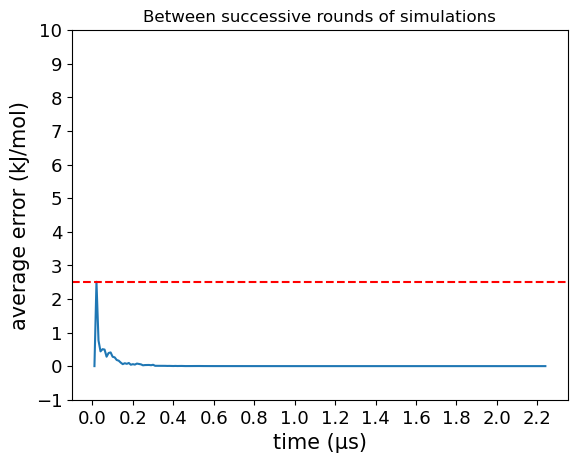

In [40]:
x=[]
y=[]
for i in Error:
    x.append(i[0])
    if i[1]>10:
        i[1]=10 # considering inf as 10 in the plot
    y.append(i[1])
    
plt.plot(x,y)
plt.xticks(np.arange(0, max(x),0.2))
plt.yticks(np.arange(-1, 11, 1))
kt=kb*temperature
plt.axhline(y=kt, color="red", linestyle="--")

plt.xlabel(u"time (\u03bcs)",fontsize=15)
plt.ylabel("average error (kJ/mol)",fontsize=15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title("Between successive rounds of simulations")

In [51]:
# convergence wrt final FES

Error2=[]

H1, _,_ = np.histogram2d(Q, RMSD, weights=weights, bins=(120,120),range=[[Qmin,Qmax],[RMSDmin,RMSDmax]])
H1 = H1.T
H1=-(1/beta)*np.log(gaussian_filter(H1,sigma=3))
H1-= np.amin(H1)

count=0
ignore=1000

while ignore < md_length:
    
    Q2=Q[:ignore*6]
    RMSD2=RMSD[:ignore*6]
    wt2=weights[:ignore*6]

    H2, _,_= np.histogram2d(Q2, RMSD2, weights=wt2, bins=(120,120),range=[[Qmin,Qmax],[RMSDmin,RMSDmax]])
    H2 = H2.T
    H2=-(1/beta)*np.log(gaussian_filter(H2,sigma=3))
    H2-= np.amin(H2)

    #Error= Delta F where F of WTM is < 10 

    F_10 =0
    N_grids = 0
    for i in range(120):
        for j in range(120):
                if H1[i,j]<10:
                    F_10 += math.sqrt((H2[i,j]-H1[i,j])**2)
                    N_grids +=1
    diff = F_10/N_grids
    Error2.append ([ignore*(10**-5),diff])

    ignore+=1000
    count+=1


/home/agupta55/tmp/ipykernel_3281931/3810066764.py:7: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1,sigma=3))
/home/agupta55/tmp/ipykernel_3281931/3810066764.py:21: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2,sigma=3))


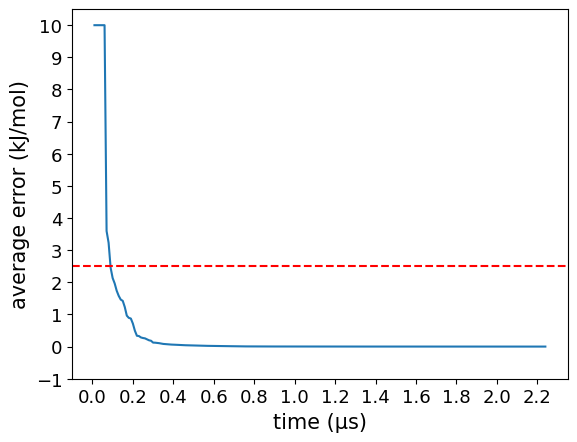

In [52]:
x=[]
y=[]
for i in Error2:
    x.append(i[0])
    if i[1]>10:
        i[1]=10 # considering inf as 10 in the plot
    y.append(i[1])
    
plt.plot(x,y)
plt.xticks(np.arange(0, max(x),0.2))
plt.yticks(np.arange(-1, 11, 1))
kt=kb*temperature
plt.axhline(y=kt, color="red", linestyle="--")

plt.xlabel(u"time (\u03bcs)",fontsize=15)
plt.ylabel("average error (kJ/mol)",fontsize=15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
#plt.title("With respect to final FES")

In [12]:
# convergence wrt PTWTM

Error3=[]

# WTM
data=np.genfromtxt("/project/zerze/ayushg/argonne/ddmd/analysis/FED/colvar_PTWTE_WTM_Gul")
ignore=25000
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])*10.0 # to convert from nm to A

logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

rmsd_lim_min=min(min(rmsd),min(RMSD))
rmsd_lim_max=max(max(rmsd),max(RMSD))

H1, _,_ = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[Qmin,Qmax],[rmsd_lim_min,rmsd_lim_max]])
H1 = H1.T
H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
H1 -= np.amin(H1) 

count=0
ignore=2000

while ignore < md_length:
    
    Q2=Q[:ignore*6]
    RMSD2=RMSD[:ignore*6]
    wt2=weights[:ignore*6]

    H2, _,_= np.histogram2d(Q2, RMSD2, weights=wt2, bins=(120,120),range=[[Qmin,Qmax],[rmsd_lim_min,rmsd_lim_max]])
    H2 = H2.T
    H2=-(1/beta)*np.log(gaussian_filter(H2,sigma=3))
    H2-= np.amin(H2)

    #Error= Delta F where F of WTM is < 10 

    F_10 =0
    N_grids = 0
    for i in range(120):
        for j in range(120):
                if H1[i,j]<10:
                    F_10 += math.sqrt((H2[i,j]-H1[i,j])**2)
                    N_grids +=1
    diff = F_10/N_grids
    Error3.append ([ignore*(10**-5),diff])

    ignore+=1000
    count+=1


/tmp/ipykernel_2498813/3497636344.py:21: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
/tmp/ipykernel_2498813/3497636344.py:35: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2,sigma=3))


Text(0.5, 1.0, 'wrt PTWTM')

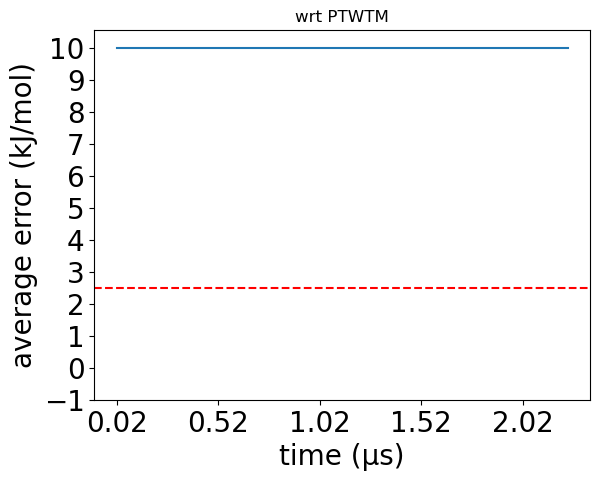

In [13]:
x=[]
y=[]
for i in Error3:
    x.append(i[0])
    if i[1]>10:
        i[1]=10 # considering inf as 10 in the plot
    y.append(i[1])
    
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x),0.5))
plt.yticks(np.arange(-1, 11, 1))
kt=kb*temperature
plt.axhline(y=kt, color="red", linestyle="--")

plt.xlabel(u"time (\u03bcs)",fontsize=20)
plt.ylabel("average error (kJ/mol)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.title("wrt PTWTM")